In [1]:
import itertools
import os

import pandas as pd

from pathlib import Path

# Method 1 - Probabilistic forecast using ML probabilistic algorithms

In [2]:
# Sets the working dorectory to the appropriate path
p = Path().absolute()
os.chdir(p.parent)

In [3]:
# Directory to store the results
predictions_directory = "results_validation"

In [4]:
# Runs the python module performing the training and prediction, and stores the results in CSV files in the previous directory (cell above).

# Note that training the quantile forest algorithm is computationally very expensive, the following commented commands will run the program using the hyper-parameters needed to obtain decent results. However, it may take several hours to run depending on the machine. To simply test that the program runs, it is recommended to run the simplified version in the next cell.

# %run -m forecaster -i instances/inputs.toml -o predictions_directory -tts price
# %run -m forecaster -i instances/inputs.toml -o predictions_directory -tts energy

In [5]:
# The following commands will run a simplified version of the program

%run -m forecaster -i instances/example_inputs.toml -o predictions_directory -tts price
%run -m forecaster -i instances/example_inputs.toml -o predictions_directory -tts energy

/Users/villena/interviews_tests/smartestenergy/forecast-earnings/.venv/lib/python3.10/site-packages/quantile_forest/_quantile_forest.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  super(BaseForestQuantileRegressor, self).fit(X, y, sample_weight=sample_weight)
/Users/villena/interviews_tests/smartestenergy/forecast-earnings/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/villena/interviews_tests/smartestenergy/forecast-earnings/.venv/lib/python3.10/site-packages/quantile_forest/_quantile_forest.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  s

In [5]:
# Loads the results from the CSV files

p_predictions = p.parent / predictions_directory

price_predictions = pd.read_csv(p_predictions / "price_predictions.csv", index_col=0).drop(["target"], axis=1)
energy_predictions = pd.read_csv(p_predictions / "energy_predictions.csv", index_col=0).drop(["target"], axis=1)

# price_predictions = pd.read_csv(p_predictions / "price_predictions.csv", index_col=0)
# energy_predictions = pd.read_csv(p_predictions / "energy_predictions.csv", index_col=0)

<Axes: >

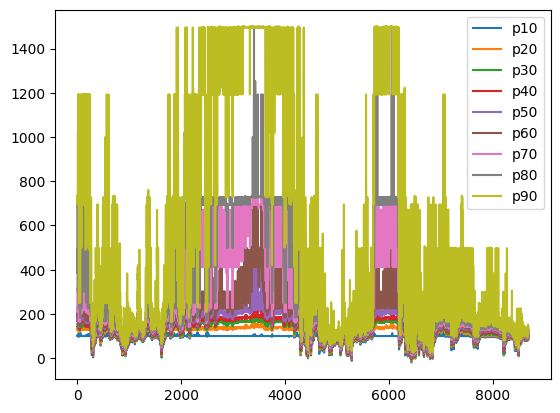

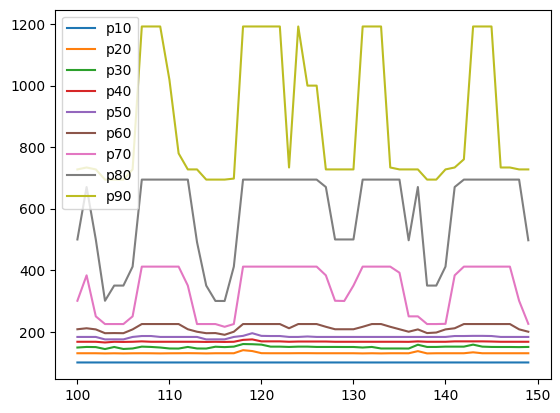

In [6]:
price_predictions.plot()
price_predictions[100:150].plot()

In [7]:
# Gets the columns (quantiles) to obtain all the possible permutations of scenarios price-energy

combination_vector = list(price_predictions.columns)
combinations = itertools.product(combination_vector, repeat=2)

In [8]:
# Fills a pandas series with the sum of the multiplications price * energy

potential_earnings = pd.Series()
for p1, p2 in combinations:
    potential_earnings[f"{p1}{p2}"] = (price_predictions[p1] * energy_predictions[p2]).sum()

<Axes: >

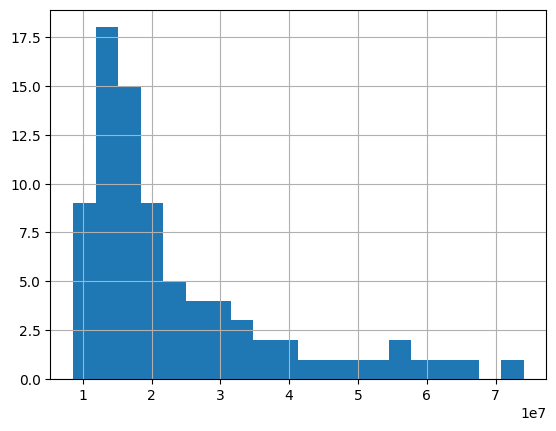

In [9]:
# Histogram of the different potential earnings

potential_earnings.hist(bins=20)

In [10]:
# Prints the P10, P50, and P90 of the potential earnings

print(f"p10 earnings = £{potential_earnings.quantile(0.1):,.2f}")
print(f"p50 earnings = £{potential_earnings.quantile(0.5):,.2f}")
print(f"p90 earnings = £{potential_earnings.quantile(0.9):,.2f}")

p10 earnings = £11,772,371.07
p50 earnings = £17,980,746.06
p90 earnings = £44,893,221.49
